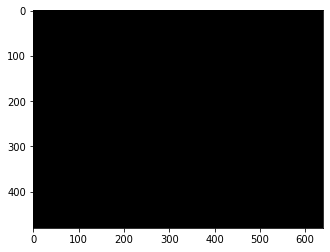

In [2]:
from PIL import Image
from matplotlib.pyplot import imshow
import numpy as np

n=640
m=480

pil_im = Image.new('RGB', (n, m))

np_im = np.asarray(pil_im)
imshow(np_im)

In [3]:
#TODO: uniforma tutti i metodi

def generate_bboxes_16_9(image):

    h = image.shape[0]
    w = image.shape[1]
    h_step = 9
    w_step = 16
    annotations = list()
    for i in range(14,30):
        out_h = h_step*i
        out_w = w_step*i
        if out_h < h and out_w < w and out_h*out_w>0.4*h*w:
            for w_start in range(0,w-out_w,w_step):
                for h_start in range(0,h-out_h,h_step):
                    annotations.append([float(h_start),float(w_start),float(h_start+out_h-1),float(w_start+out_w-1)])
    return annotations

def generate_bboxes_4_3(image):

    h = image.shape[0]
    w = image.shape[1]
    h_step = 12
    w_step = 16
    annotations = list()
    for i in range(14,30):
        out_h = h_step*i
        out_w = w_step*i
        if out_h < h and out_w < w and out_h*out_w>0.4*h*w:
            for w_start in range(0,w-out_w,w_step):
                for h_start in range(0,h-out_h,h_step):
                    annotations.append([float(h_start),float(w_start),float(h_start+out_h-1),float(w_start+out_w-1)])
    return annotations

def generate_bboxes_1_1(image):

    h = image.shape[0]
    w = image.shape[1]
    h_step = 12
    w_step = 12
    annotations = list()
    for i in range(14,30):
        out_h = h_step*i
        out_w = w_step*i
        if out_h < h and out_w < w and out_h*out_w>0.4*h*w:
            for w_start in range(0,w-out_w,w_step):
                for h_start in range(0,h-out_h,h_step):
                    annotations.append([float(h_start),float(w_start),float(h_start+out_h-1),float(w_start+out_w-1)])
    return annotations

def make_crop_coordinates(image):
    height = image.shape[0]
    width = image.shape[1]
    coodinates = []
    shorter_dimension = min(width, height)
    position_step = shorter_dimension / 80
    sizes = [shorter_dimension * 0.8,
             shorter_dimension * 0.9, shorter_dimension]
    for size in sizes:
        position_width = 0
        while True:
            position_height = 0
            while True:
                coodinates.append((position_width, position_height,
                                   position_width + size, position_height + size))
                position_height += position_step
                if position_height > height - size:
                    break
            position_width += position_step
            if position_width > width - size:
                break
    return coodinates

(0, 60.0, 384.0, 444.0)


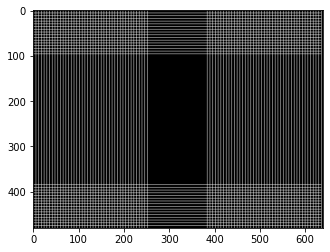

In [4]:
from PIL import ImageFont, ImageDraw, ImageEnhance


pil_im = Image.new('RGB', (n, m))
np_im = np.asarray(pil_im)
print(make_crop_coordinates(np_im)[10])

draw = ImageDraw.Draw(pil_im)

for bbox in make_crop_coordinates(np_im):    
    draw.rectangle(((bbox[0], bbox[1]), (bbox[2], bbox[3])),  outline="white")

rect1_1 = (60, 60)
rect1_2 = (160, 160)

rect2_1 = (360, 160)
rect2_2 = (460, 260)
#draw.rectangle((rect1_1, rect1_2),  outline="white")
#draw.rectangle((rect2_1, rect2_2),  outline="white")

imshow(np.asarray(pil_im))

In [64]:
hull = [rect1_1, rect1_2,rect2_1, rect2_2]
print(hull)

[(60, 60), (160, 160), (360, 160), (460, 260)]


### Minimum enclosing rectangle

[(60, 60), (460, 60), (460, 260), (60, 260)]


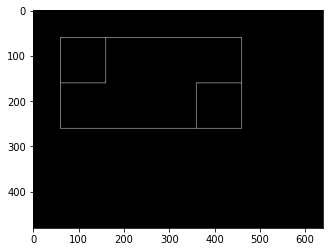

In [65]:
import numpy as np

def bounding_box(coords):

    min_x = 100000 # start with something much higher than expected min
    min_y = 100000
    max_x = -100000 # start with something much lower than expected max
    max_y = -100000

    for item in coords:
        if item[0] < min_x:
            min_x = item[0]

        if item[0] > max_x:
            max_x = item[0]

        if item[1] < min_y:
            min_y = item[1]

        if item[1] > max_y:
            max_y = item[1]

    return [(min_x,min_y),(max_x,min_y),(max_x,max_y),(min_x,max_y)]

crop = bounding_box(hull)
print(crop)

np_im = np.asarray(pil_im)

draw = ImageDraw.Draw(pil_im)

#for bbox in make_crop_coordinates(np_im):    
#    draw.rectangle(((bbox[0], bbox[1]), (bbox[2], bbox[3])),  outline="white")

rect1_1 = (60, 60)
rect1_2 = (160, 160)

rect2_1 = (360, 160)
rect2_2 = (460, 260)
draw.rectangle((crop[0], crop[2]),  outline="white")

imshow(np.asarray(pil_im))


### Calculate crop value

In [82]:
pil_im = Image.new('L', (10, 10))
np_im = np.asarray(pil_im)

draw = ImageDraw.Draw(pil_im)

#for bbox in make_crop_coordinates(np_im):    
#    draw.rectangle(((bbox[0], bbox[1]), (bbox[2], bbox[3])),  outline="white")

rect1_1 = (1, 1)
rect1_2 = (3, 3)

rect2_1 = (5, 5)
rect2_2 = (7, 7)
draw.rectangle((rect1_1, rect1_2),  fill = "white", outline="white")
draw.rectangle((rect2_1, rect2_2),  fill = "white", outline="white")


pil_im=pil_im.crop((2,2,6,6))


print(np.sum(np.asarray(pil_im)))

[[  0   0   0   0   0   0   0   0   0   0]
 [  0 255 255 255   0   0   0   0   0   0]
 [  0 255 255 255   0   0   0   0   0   0]
 [  0 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 255 255 255   0   0]
 [  0   0   0   0   0 255 255 255   0   0]
 [  0   0   0   0   0 255 255 255   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]
1275
